Task 6- GRIPAPRIL21

Decision Tree Classifier - Iris Dataset

Author- Arkapravo Nandi

Importing the Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

Importing the Iris DataSet

In [4]:
iris_set = datasets.load_iris()
data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
data["species"] = iris_set.target

In [5]:
print(iris_set)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


The Iris DataSet Contains information of 3 classes of the Iris Plant with the following attributes:-

(1) Sepal Length

(2) Sepal Width

(3) Petal Length

There are 3 Classes of Iris Plants are:-

(1) Iris Setosa

(2) Iris Versicolour

(3) Iris Virginica

In [7]:
data.shape

(150, 5)

How Many Data Points of Each Target Class are Present ?

In [8]:
data["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

Checking if there are Null Values Are Present in DataSet or Not

In [9]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Visualising The Sepal and Petal Dimensions

In [10]:
sns.set_style("darkgrid")

With the Help of Scatterplot Visualising the Sepal Dimensions of Different Classes of Flowers

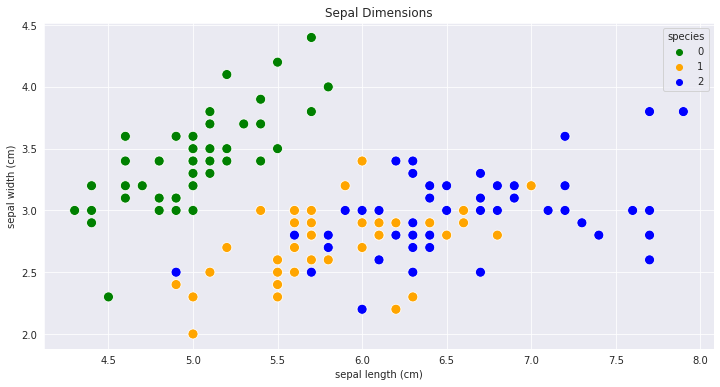

In [11]:
plt.figure(figsize = (12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=data["sepal length (cm)"], y=data["sepal width (cm)"], hue=data["species"],palette = ["green","orange","blue"],s=100);


This Plot gives information the that the "species 0 " has small sepal length and large sepal width and other side " species 2" has large sepal length and small sepal width. In some cases it is very difficult to classify " species 1" and "species 2" because they almost have same sepal dimensions. Here , it is easy to seperate "species 0" from the other species with linear boundary on the basis of Sepal Dimensions.

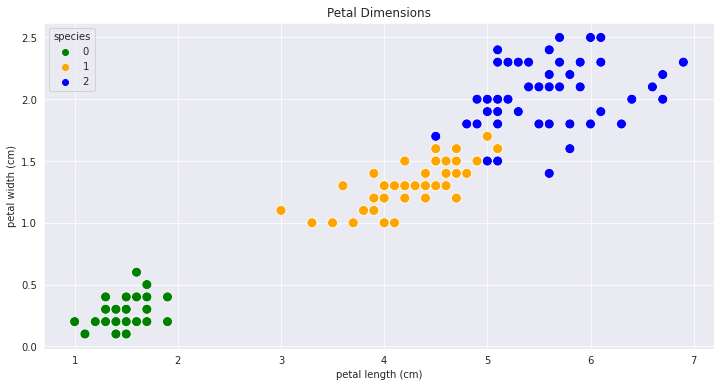

In [12]:
plt.figure(figsize = (12,6))
plt.title('Petal Dimensions')
sns.scatterplot(x=data["petal length (cm)"], y=data["petal width (cm)"], hue=data["species"],palette = ["green","orange","blue"],s=100);

Here "species 0" has small petal length and petal width. It can be observed that there is a linear relationship between petal length and petal width for all
species.

Analysing The Distributions of Sepal and Petal Dimensions

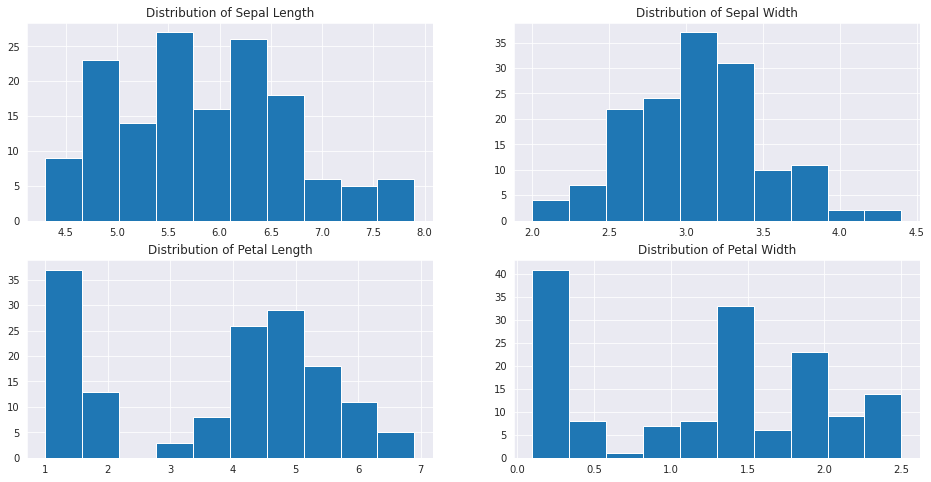

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(data["petal width (cm)"]);

It is Observed that Sepal Width Follows Normal Distribution and Sepal Length is Rightly Skewed.

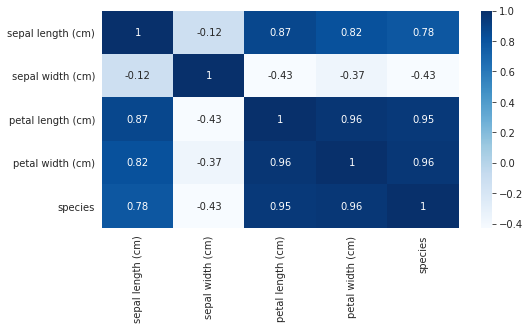

In [15]:
plt.figure(figsize = (8,4))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues');

The plot insights that Petal Width and Petal Length are highly correlated, while sepal length and sepal width are weakly correlated.

Splitting The Data into Training and Test Data Set

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

Since, this is a Classification Problem , we will import the DecisionTreeClassifier Function From Sklearn Library

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Finding the Shape of the Test and Train DataSet

In [18]:
train.shape, test.shape

((120, 5), (30, 5))

Seperating the Features Dataset and Target DataSet

In [19]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [20]:
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)
predictions = clf.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9666666666666667


The Accuracy of the Decision Tree is 90%, hence we can now fit the Model for entire data and test for the New Data

In [21]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = data.species

Create another Decision Tree Model

In [22]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


Let Us Visualize the Decision Tree to Understand Better

In [23]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


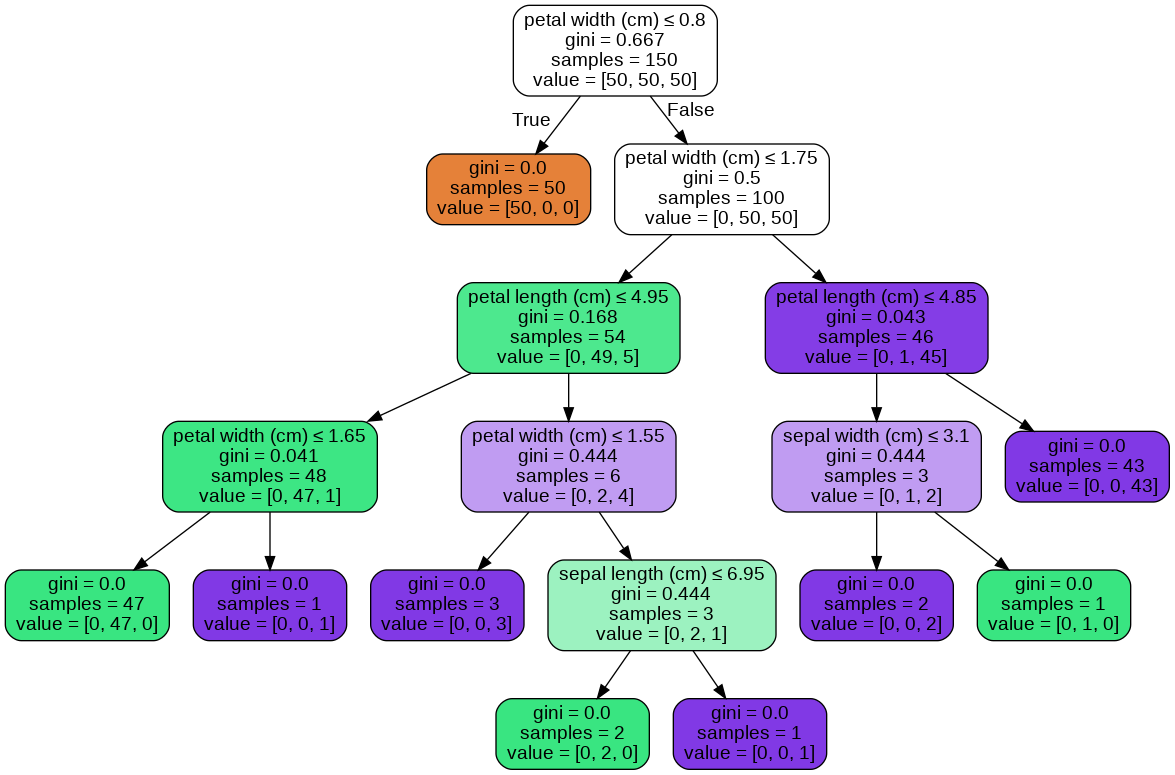

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())